In [2]:
'''
Visualizações de estatísticas de texto são técnicas simples, mas muito informativas.

Elas incluem:

análise de frequência de palavras,

análise do comprimento das frases,

análise do comprimento médio das palavras
'''

'\nVisualizações de estatísticas de texto são técnicas simples, mas muito informativas.\n\nElas incluem:\n\nanálise de frequência de palavras,\n\nanálise do comprimento das frases,\n\nanálise do comprimento médio das palavras\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import deepl
from collections import  Counter
from collections import defaultdict
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline
sns.set_style("darkgrid")

In [3]:
# ----------------------------
# CONFIGURAR DEEPL
# ----------------------------
auth_key = "bcb63911-3d5d-4b37-8e8e-84d3164e1e93:fx"
translator = deepl.DeepLClient(auth_key)

df_balanced = pd.read_excel('./dataset_pre_processado.xlsx')
df_balanced.head()
#df_balanced.info()
#df_balanced.describe()

,sentiments,cleaned_review,cleaned_review_length,review_score,sentiments_final
0,positive,i wish would have gotten one earlier love it a...,19,5,2
1,neutral,i ve learned this lesson again open the packag...,88,1,1
2,neutral,it is so slow and lags find better option,9,2,1
3,neutral,roller ball stopped working within months of m...,12,1,1
4,neutral,i like the color and size but it few days out ...,21,1,1


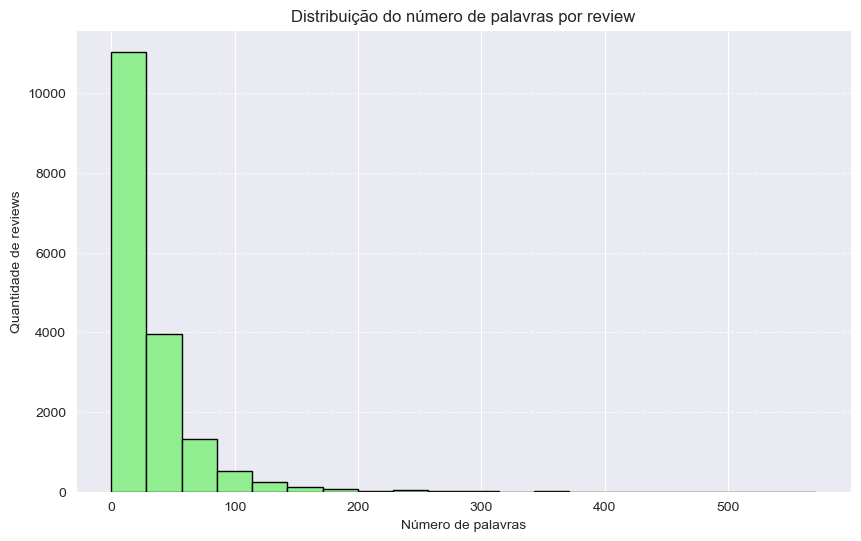

C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\185877335.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=translated_words, palette="viridis")


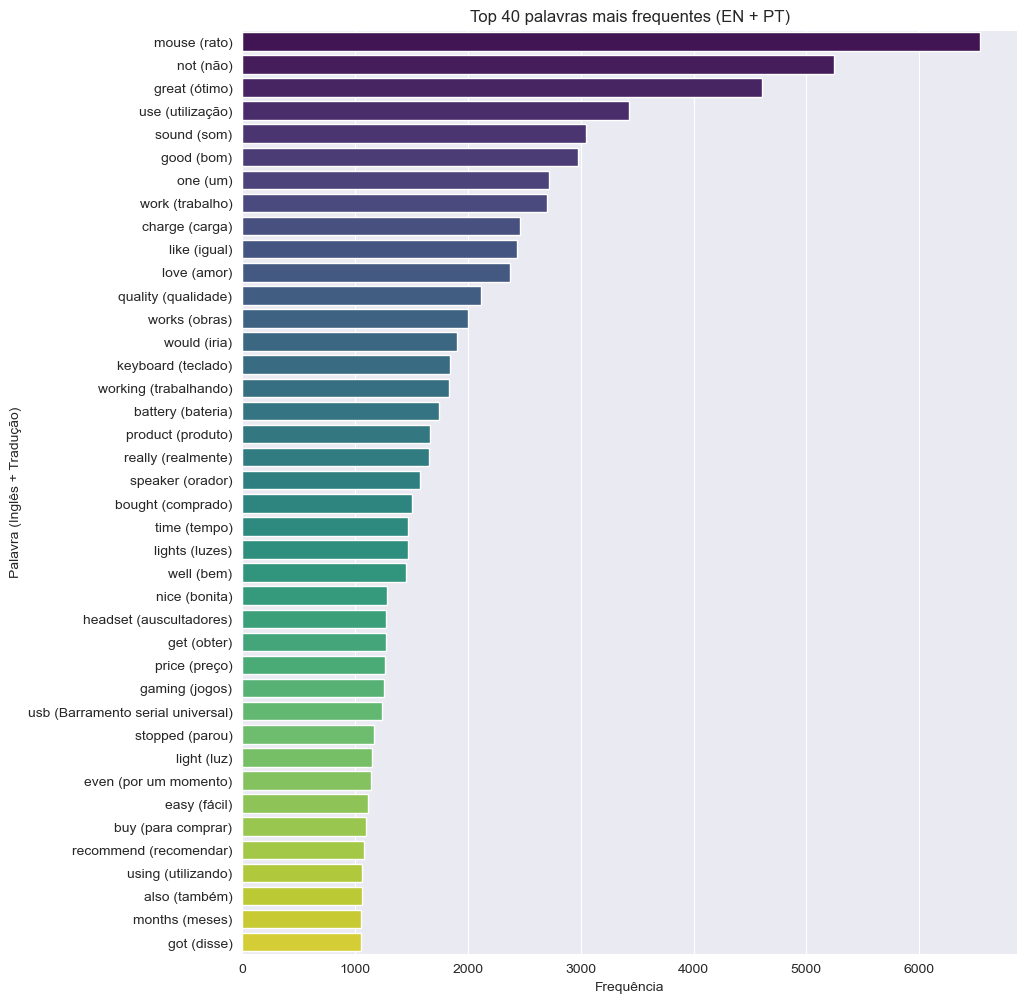

In [75]:
stop = set(stopwords.words('english'))
stop.discard('not')

# Histograma do número de palavras por review
plt.figure(figsize=(10,6))
df_balanced['cleaned_review'].str.split()\
    .map(lambda x: len(x))\
    .hist(bins=20, color='lightgreen', edgecolor='black')

plt.title('Distribuição do número de palavras por review')
plt.xlabel('Número de palavras')
plt.ylabel('Quantidade de reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


def plot_top_words_with_translation(text_series, top_n=40, auth_key=None):
    """
    Plota as top_n palavras mais frequentes de uma série de textos,
    exibindo cada palavra em inglês com a tradução para português entre parênteses.
    
    text_series: pd.Series com os textos
    top_n: número de palavras a mostrar
    auth_key: chave do DeepL
    """

    if auth_key is None:
        print("⚠️ É necessário passar a auth_key do DeepL")
        return

    translator = deepl.DeepLClient(auth_key)

    # Stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")  # manter "not"

    # Cria corpus plano
    words_list = text_series.str.split().values.tolist()
    corpus = [word.lower() for review in words_list for word in review]

    # Contagem de palavras
    counter = Counter(corpus)
    most = [(word, count) for word, count in counter.most_common() if word not in stop][:top_n]

    words_en, counts = zip(*most)

    # Traduzir palavras com cache
    translation_cache = {}
    translated_words = []
    for w in words_en:
        if w in translation_cache:
            translated_words.append(f"{w} ({translation_cache[w]})")
        else:
            try:
                result = translator.translate_text(w, target_lang="PT-PT")
                translation_cache[w] = result.text
                translated_words.append(f"{w} ({result.text})")
            except:
                translated_words.append(w)

    # Plot
    plt.figure(figsize=(10, 12))
    sns.barplot(x=counts, y=translated_words, palette="viridis")
    plt.title(f"Top {top_n} palavras mais frequentes (EN + PT)")
    plt.xlabel("Frequência")
    plt.ylabel("Palavra (Inglês + Tradução)")
    plt.show()

plot_top_words_with_translation(df_balanced['cleaned_review'], top_n=40, auth_key=auth_key)



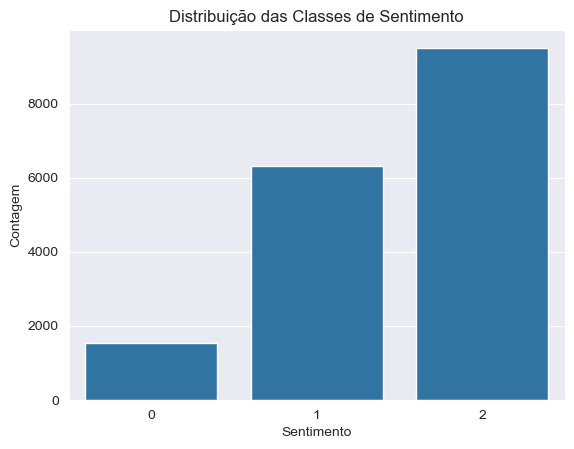

In [43]:
sns.countplot(x='sentiments_final', data=df_balanced)
plt.title('Distribuição das Classes de Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

#0 negativa, 1 neutro, 2 positivo

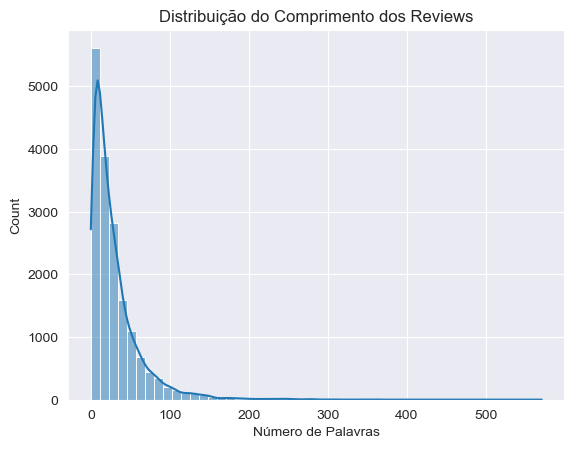

In [47]:
sns.histplot(df_balanced['cleaned_review_length'], bins=50, kde=True)
plt.title('Distribuição do Comprimento dos Reviews')
plt.xlabel('Número de Palavras')
plt.show()

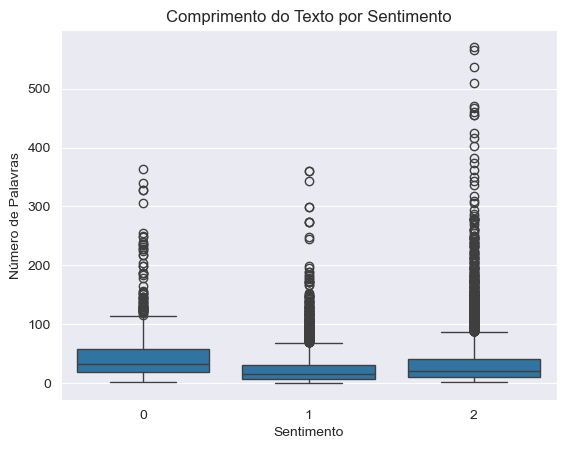

In [49]:
sns.boxplot(x='sentiments_final', y='cleaned_review_length', data=df_balanced)
plt.title('Comprimento do Texto por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Número de Palavras')
plt.show()

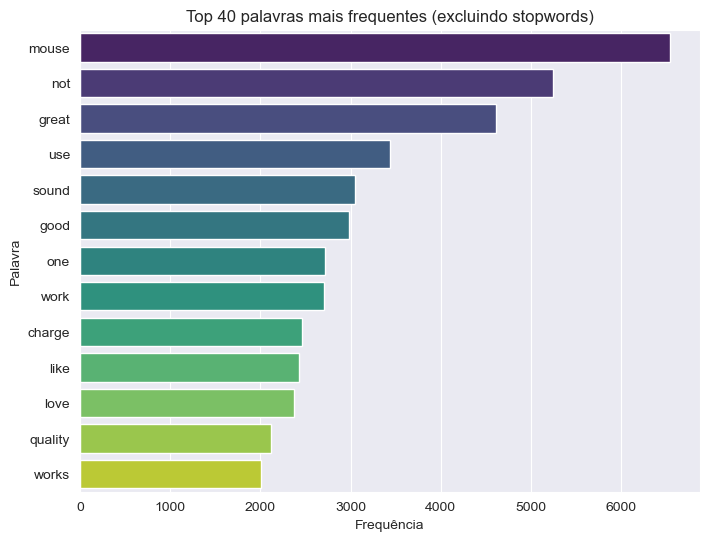

In [55]:
#ESSE GRÁFICO TÁ REPETIDO ERNESTO

# Mantemos o set de stopwords
stop = set(stopwords.words('english'))
stop.discard('not')  # mantém 'not'

# Cria o corpus
corpus = [word.lower() for review in df_balanced['cleaned_review'].str.split().values.tolist() for word in review]

# Conta todas as palavras
counter = Counter(corpus)
most = counter.most_common()

# Filtra as top 40 palavras que não são stopwords
x, y = [], []
for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

# Plota
plt.figure(figsize=(8,6))
sns.barplot(
    x=y,
    y=x,
    hue=x,
    palette="viridis",
    legend=False
)

plt.title('Top 40 palavras mais frequentes (excluindo stopwords)')
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.show()


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\2508669140.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_list, y=translated_words, palette="viridis")


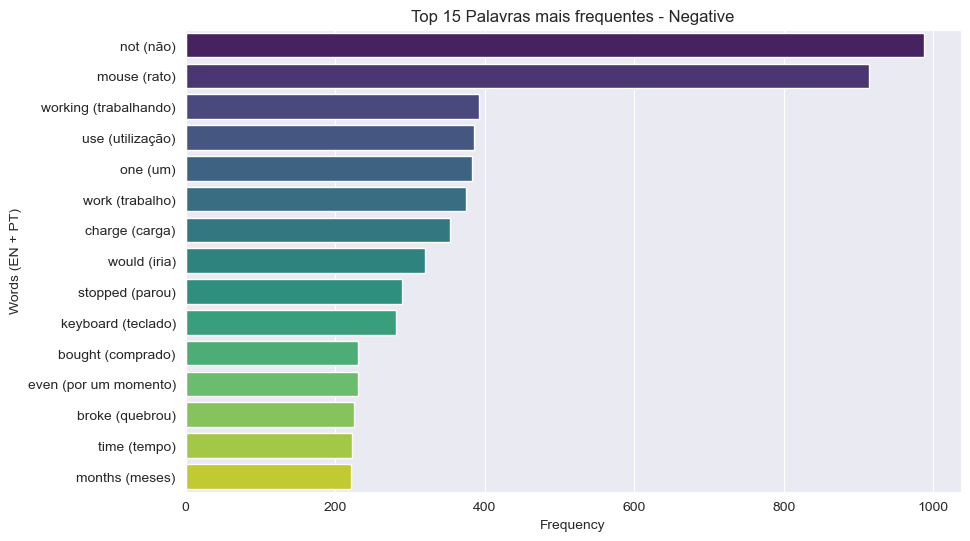

C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\2508669140.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_list, y=translated_words, palette="viridis")


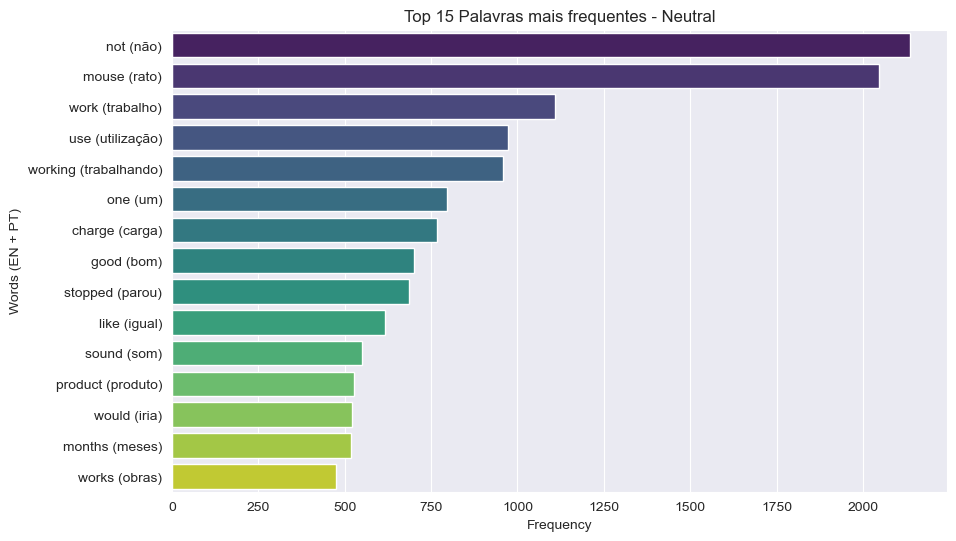

C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\2508669140.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_list, y=translated_words, palette="viridis")


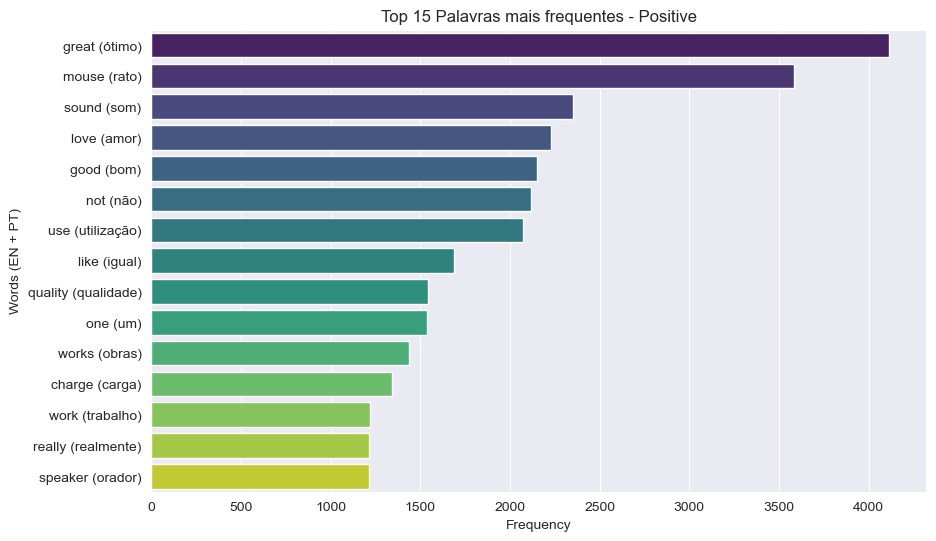

In [71]:


# stop_words = set(stopwords.words('english'))
# stop_words.discard('not')

# for label in df_balanced['sentiments_final'].unique():
#     subset = df_balanced[df_balanced['sentiments_final'] == label]

#     words = " ".join(subset['cleaned_review']).lower().split()
#     words = [w for w in words if w not in stop_words and len(w) > 2]

#     common_words = Counter(words).most_common(15)

#     print(f"Sentimento { label }:")
#     print([word for word, _ in common_words])
#     print("-" * 30)


def plot_top_words_by_sentiment_translated(df, text_col="cleaned_review",
                                           label_col="sentiments_final", top_n=15):
    """
    Plota os top_n palavras mais frequentes para cada sentimento,
    e mostra cada palavra em inglês + tradução em português usando DeepL.
    """
    # Stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")  # mantém "not"

    # DeepL Translator
    translator = deepl.DeepLClient(auth_key)

    # Mapear labels
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

    # Cache de traduções (para não traduzir palavras repetidas)
    translation_cache = {}

    # Para cada sentimento
    for label in sorted(df[label_col].unique()):

        subset = df[df[label_col] == label]

        # Junta todas as reviews da classe
        words = " ".join(subset[text_col]).lower().split()

        # Remove stopwords e palavras curtas
        words = [w for w in words if w not in stop_words and len(w) > 2]

        # Frequência
        common_words = Counter(words).most_common(top_n)

        # Separar palavras e contagens
        word_list = [w for w, c in common_words]
        count_list = [c for w, c in common_words]

        # Traduzir palavras (com cache)
        translated_words = []
        for w in word_list:
            if w in translation_cache:
                translated_words.append(f"{w} ({translation_cache[w]})")
            else:
                try:
                    result = translator.translate_text(w, target_lang="PT-PT")
                    translation_cache[w] = result.text
                    translated_words.append(f"{w} ({result.text})")
                except:
                    translated_words.append(w)

        # Plot
        plt.figure(figsize=(10,6))
        sns.barplot(x=count_list, y=translated_words, palette="viridis")
        plt.title(f"Top {top_n} Palavras mais frequentes - {sentiment_map[label]}")
        plt.xlabel("Frequency")
        plt.ylabel("Words (EN + PT)")
        plt.show()


plot_top_words_by_sentiment_translated(df_balanced, top_n=15)



Sentimento 2:


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\4222999700.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_translated, palette='viridis')


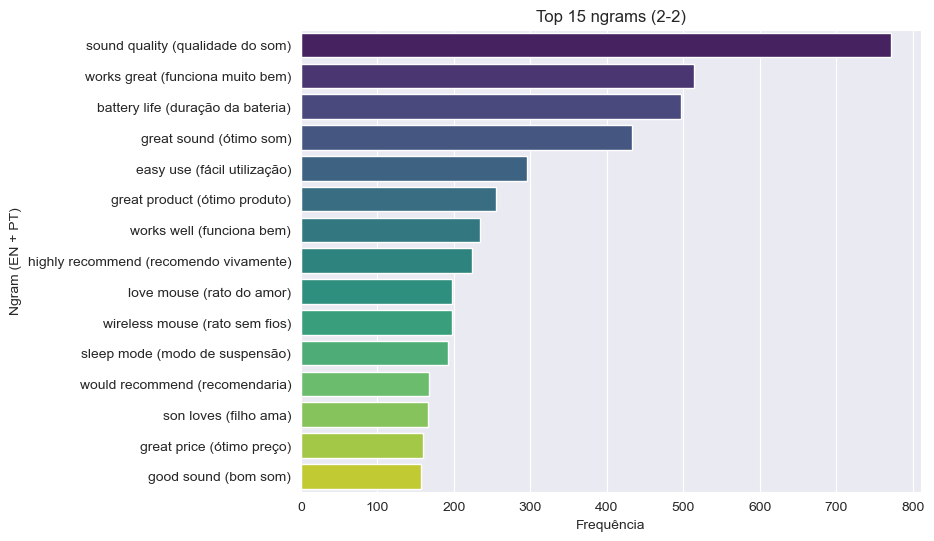

------------------------------
Sentimento 1:


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\4222999700.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_translated, palette='viridis')


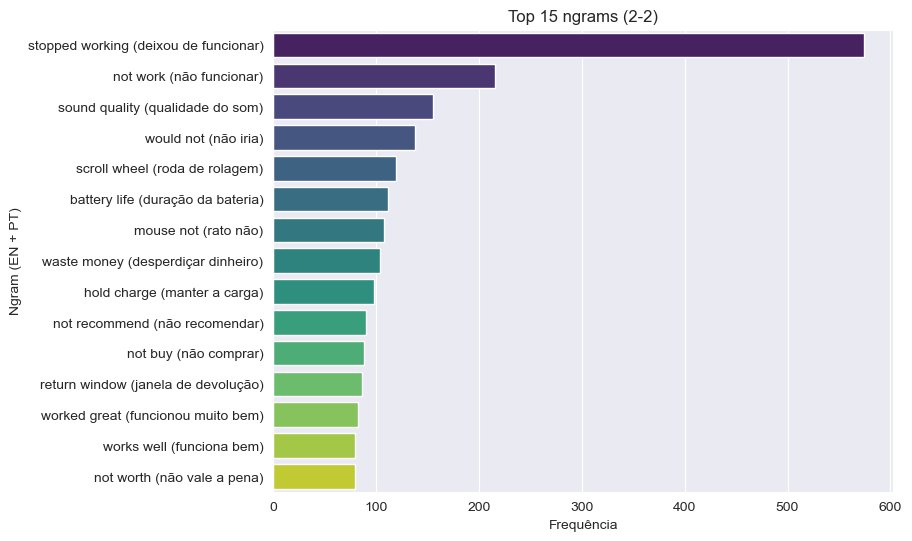

------------------------------
Sentimento 0:


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\4222999700.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_translated, palette='viridis')


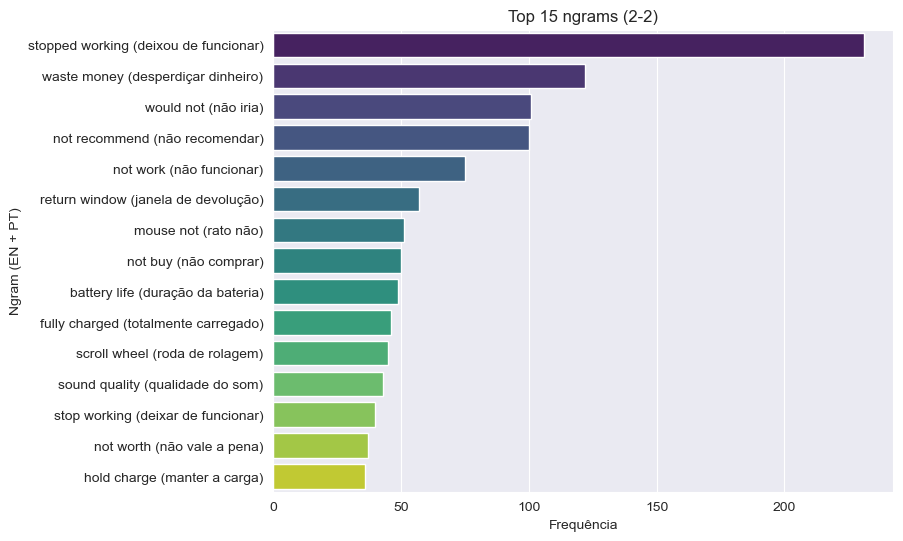

------------------------------


In [83]:


# Mantemos o set de stopwords, mas não removemos "not"
stop_words = set(stopwords.words('english'))
stop_words.discard('not')

def plot_top_ngrams_translated(text_series, ngram_range=(2,2), top_n=15, auth_key=None):
    """
    Plota os top_n ngrams mais frequentes de uma série de textos,
    mostrando ngram em inglês e tradução em português entre parênteses.
    """
    if auth_key is None:
        print("⚠️ É necessário passar a auth_key do DeepL")
        return

    translator = deepl.DeepLClient(auth_key)

    # Mantemos stopwords, mas não removemos 'not'
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')

    # Vetorizador
    vectorizer = CountVectorizer(stop_words=list(stop_words),
                                 ngram_range=ngram_range, min_df=1)
    X = vectorizer.fit_transform(text_series)

    # Frequência de cada ngram
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    # Separar palavras e frequências
    ngrams_en, counts = zip(*words_freq)

    # Traduzir ngrams (com cache)
    translation_cache = {}
    ngrams_translated = []
    for ng in ngrams_en:
        if ng in translation_cache:
            ngrams_translated.append(f"{ng} ({translation_cache[ng]})")
        else:
            try:
                result = translator.translate_text(ng, target_lang="PT-PT")
                translation_cache[ng] = result.text
                ngrams_translated.append(f"{ng} ({result.text})")
            except:
                ngrams_translated.append(ng)

    # Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=counts, y=ngrams_translated, palette='viridis')
    plt.title(f'Top {top_n} ngrams ({ngram_range[0]}-{ngram_range[1]})')
    plt.xlabel('Frequência')
    plt.ylabel('Ngram (EN + PT)')
    plt.show()


for label in df_balanced['sentiments_final'].unique():
    subset = df_balanced[df_balanced['sentiments_final'] == label]
    print(f"Sentimento {label}:")
    plot_top_ngrams_translated(subset['cleaned_review'], ngram_range=(2,2), top_n=15, auth_key=auth_key)
    print("-"*30)


Sentimento 0 - Negative


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\1028139165.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words_translated, palette='magma')


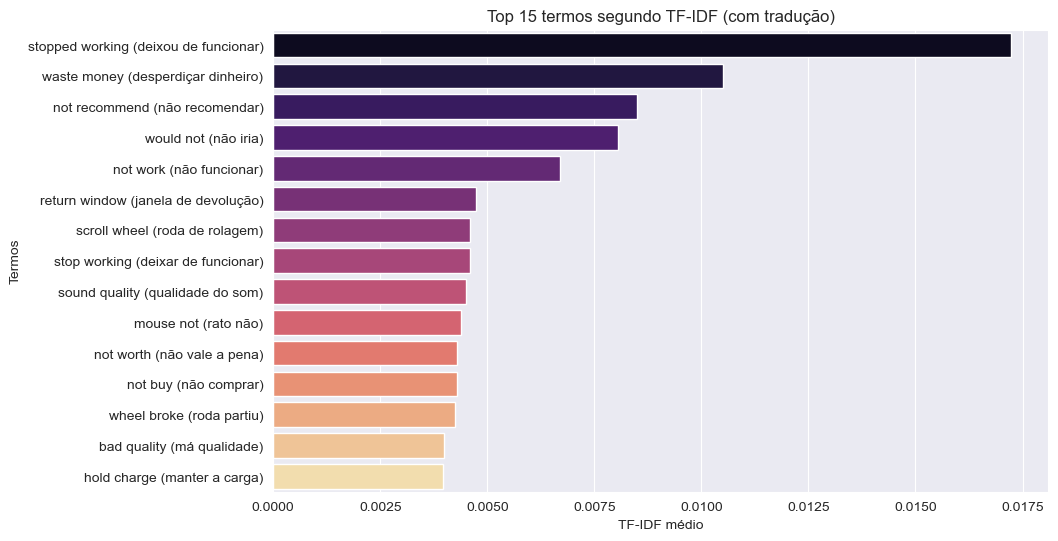

------------------------------
Sentimento 1 - Neutral


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\1028139165.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words_translated, palette='magma')


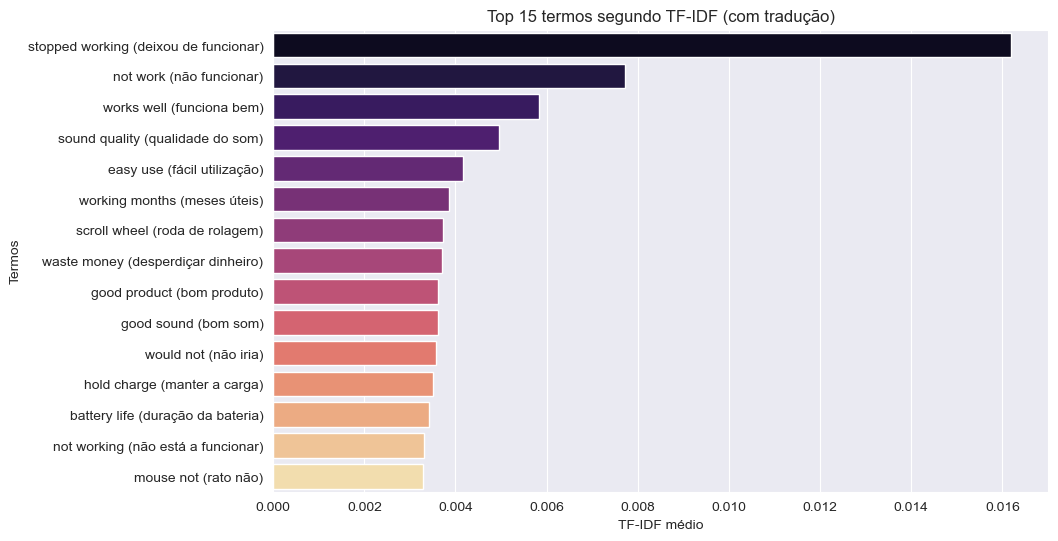

------------------------------
Sentimento 2 - Positive


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\1028139165.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words_translated, palette='magma')


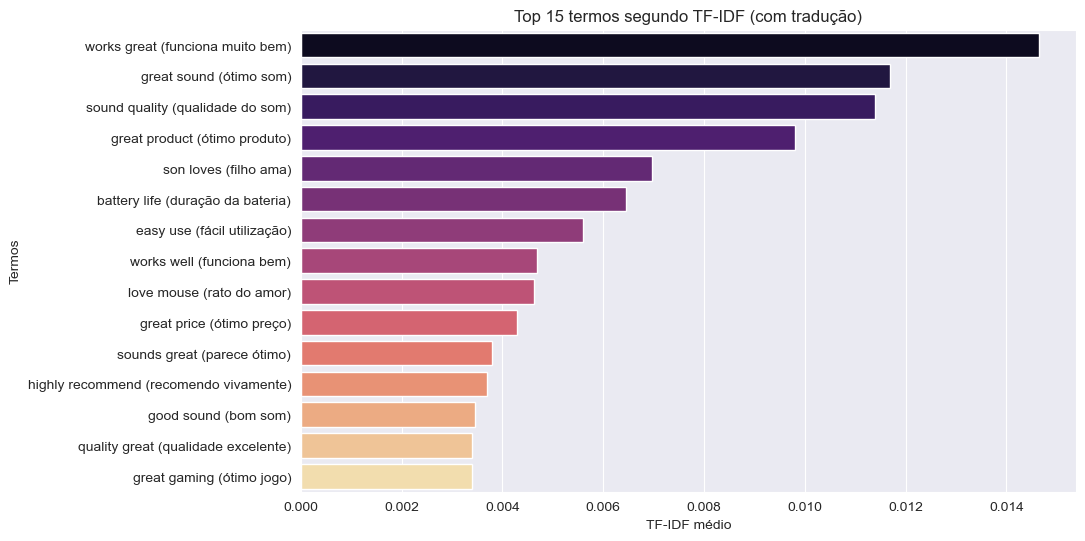

------------------------------


In [87]:


stop_words = set(stopwords.words('english'))
stop_words.discard('not')

def plot_top_tfidf_translated(text_series, top_n=15, ngram_range=(1,1), target_lang="PT-PT"):
    """
    Plota os top_n termos mais relevantes segundo TF-IDF,
    mostrando também a tradução entre parênteses.
    """
    vectorizer = TfidfVectorizer(stop_words=list(stop_words), ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    
    # Calcula a média de TF-IDF de cada termo
    tfidf_mean = X.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    
    # Junta termos e seus scores
    tfidf_scores = list(zip(terms, tfidf_mean))
    
    # Ordena pelo score
    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    words_en, scores = zip(*tfidf_scores)
    
    # Traduzir palavras
    words_translated = []
    for w in words_en:
        try:
            result = translator.translate_text(w, target_lang=target_lang)
            words_translated.append(f"{w} ({result.text})")
        except:
            words_translated.append(f"{w} ({w})")  # fallback se falhar
    
    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x=scores, y=words_translated, palette='magma')
    plt.title(f"Top {top_n} termos segundo TF-IDF (com tradução)")
    plt.xlabel("TF-IDF médio")
    plt.ylabel("Termos")
    plt.show()


# Exemplo: por sentimento
sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

for label in sorted(df_balanced['sentiments_final'].unique()):
    subset = df_balanced[df_balanced['sentiments_final'] == label]
    print(f"Sentimento {label} - {sentiment_map[label]}")
    plot_top_tfidf_translated(subset['cleaned_review'], top_n=15, ngram_range=(2,2))
    print("-"*30)

C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_17108\709985613.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=translated_words, palette='magma')


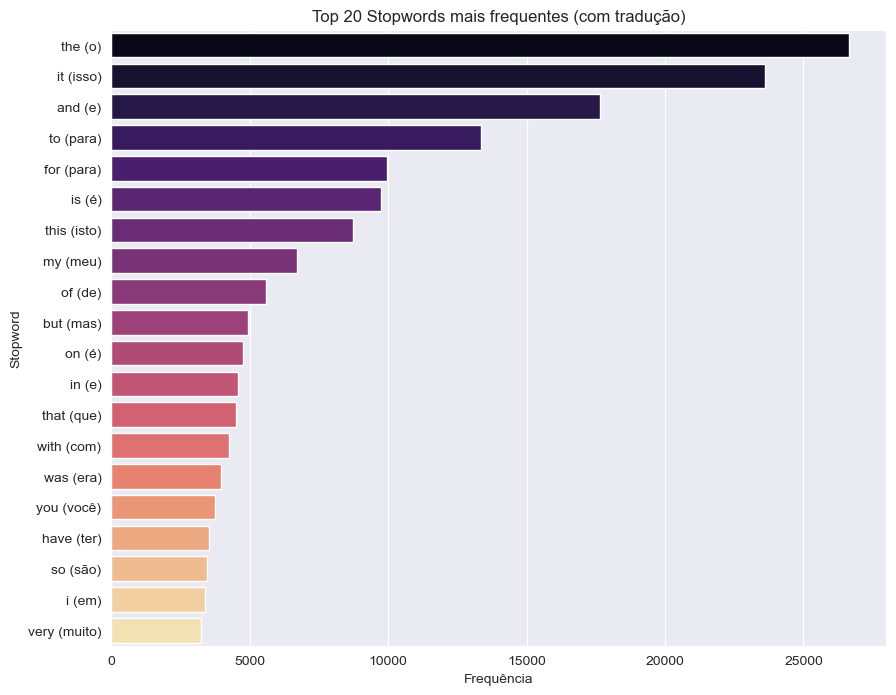

In [89]:
# Mantemos o set de stopwords
stop = set(stopwords.words('english'))
stop.discard('not')  # mantém 'not'

# Cria o corpus
corpus = []
new = df_balanced['cleaned_review'].str.split()
new = new.values.tolist()
corpus = [word.lower() for review in new for word in review]

# Conta a frequência das stopwords
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

# Ordena as mais comuns
sorted_stopwords = sorted(dic.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_stopwords[:20])  # pega top 20 stopwords

# Traduzir palavras usando DeepL
translated_words = []
for w in words:
    try:
        result = translator.translate_text(w, target_lang="PT-PT")
        translated_words.append(f"{w} ({result.text})")
    except:
        translated_words.append(f"{w} ({w})")  # fallback se falhar

# Plota
plt.figure(figsize=(10,8))
sns.barplot(x=counts, y=translated_words, palette='magma')
plt.title('Top 20 Stopwords mais frequentes (com tradução)')
plt.xlabel('Frequência')
plt.ylabel('Stopword')
plt.show()


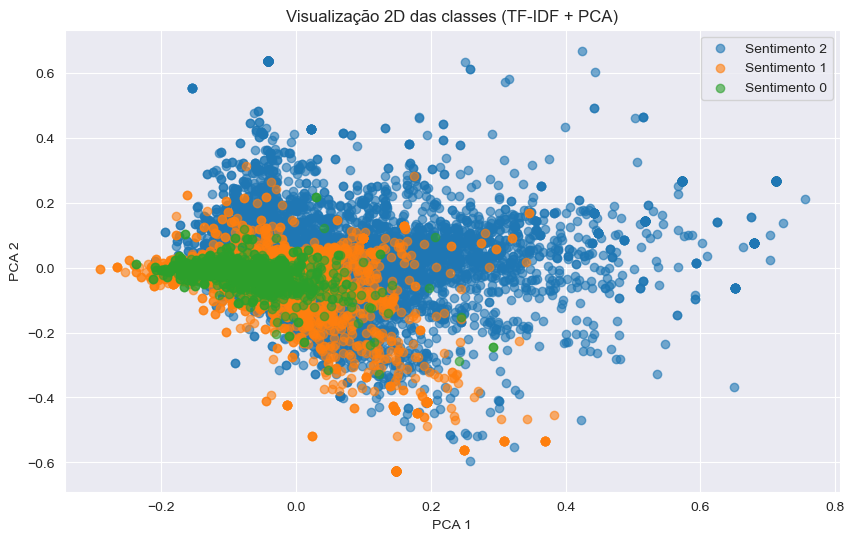

In [91]:

# TF-IDF
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(df_balanced['cleaned_review'])

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plotando
plt.figure(figsize=(10,6))
for label in df_balanced['sentiments_final'].unique():
    subset_idx = df_balanced['sentiments_final'] == label
    plt.scatter(X_pca[subset_idx,0], X_pca[subset_idx,1], label=f'Sentimento {label}', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualização 2D das classes (TF-IDF + PCA)')
plt.legend()
plt.show()


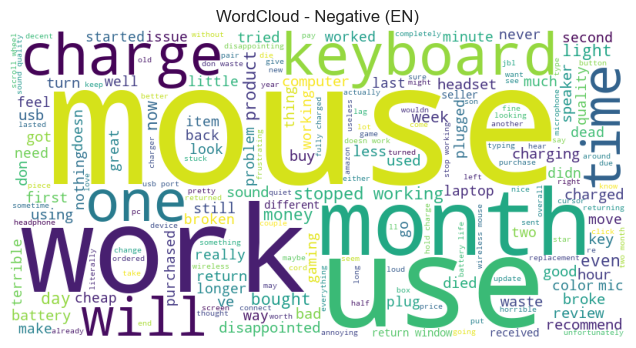

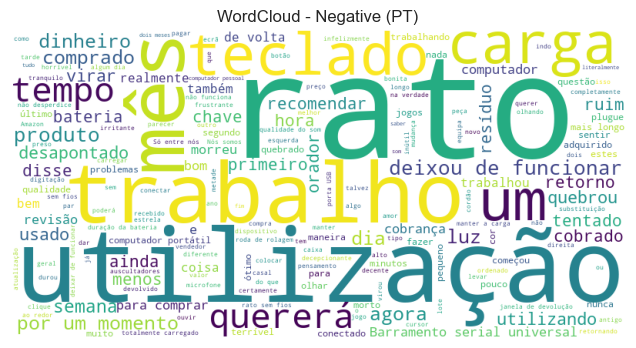

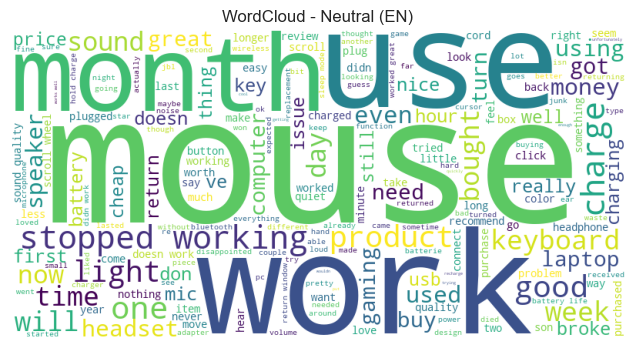

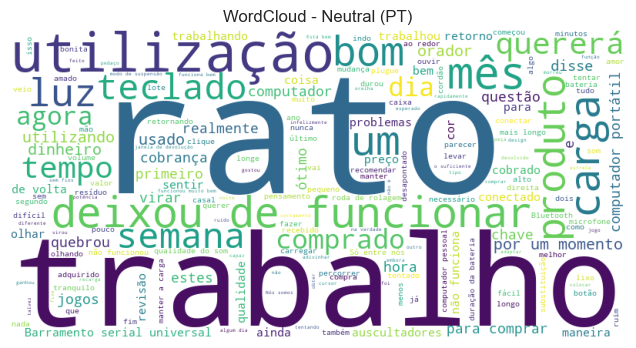

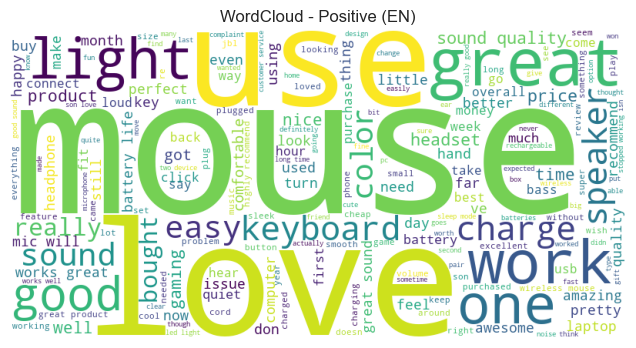

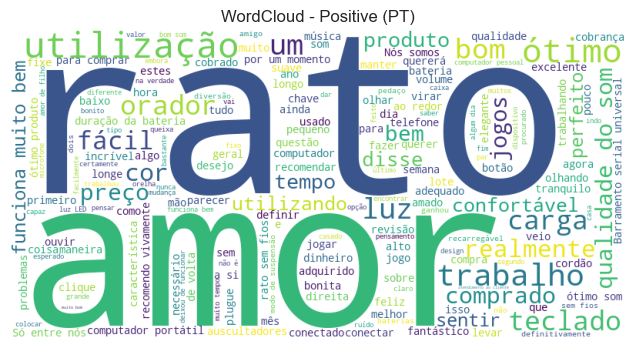

In [7]:
# Função para traduzir apenas as palavras que vamos usar na WordCloud
def translate_words(words, translator, target_lang="PT-PT"):
    translated = []
    for w in words:
        try:
            result = translator.translate_text(w, target_lang=target_lang)
            translated.append(result.text)
        except:
            translated.append(w)  # fallback caso falhe
    return translated

# Mapeamento dos sentimentos
sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

# Loop por sentimento
for label in sorted(df_balanced['sentiments_final'].unique()):
    # Texto original
    text_en = " ".join(df_balanced[df_balanced['sentiments_final']==label]['cleaned_review'])
    
    # -------------------------
    # WordCloud em inglês
    # -------------------------
    wc_en = WordCloud(width=800, height=400, background_color='white').generate(text_en)
    
    plt.figure(figsize=(10,4))
    plt.imshow(wc_en)
    plt.axis('off')
    plt.title(f'WordCloud - {sentiment_map[label]} (EN)')
    plt.show()
    
    # -------------------------
    # Extrair palavras da WordCloud
    # -------------------------
    words_freq = wc_en.words_  # dicionário {palavra: frequência relativa}
    words = list(words_freq.keys())
    
    # -------------------------
    # Traduzir apenas essas palavras
    # -------------------------
    words_translated = translate_words(words, translator, target_lang="PT-PT")
    
    # Criar novo dicionário para WordCloud em PT
    wc_dict_pt = {pt: words_freq[en] for en, pt in zip(words, words_translated)}

    # -------------------------
    # WordCloud em português
    # -------------------------
    wc_pt = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc_dict_pt)
    
    plt.figure(figsize=(10,4))
    plt.imshow(wc_pt)
    plt.axis('off')
    plt.title(f'WordCloud - {sentiment_map[label]} (PT)')
    plt.show()

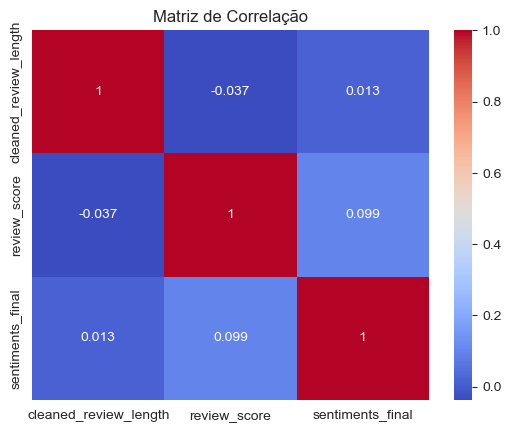

In [5]:
df_balanced[['cleaned_review_length', 'review_score', 'sentiments_final']].corr()
sns.heatmap(df_balanced[['cleaned_review_length', 'review_score', 'sentiments_final']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()